In [1]:
import fastf1 as ff1
from fastf1 import plotting
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.style as stl
stl.use('dark_background')

In [2]:
ff1.Cache.enable_cache('/Users/javi/Library/Caches')

In [3]:
pd.options.mode.chained_assignment = None

In [4]:
race = ff1.get_session(2022, 'Australia', 'R')
laps = race.load_laps()

/usr/local/lib/python3.9/site-packages/fastf1/core.py:1093: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Australian Grand Prix - Race [v2.2.1]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['16', '11', '63', '44', '4', '3', '31', '77', '10', '23', '24', '18', '47', '20', '22', '6', '14', '1', '5', '55']


In [5]:
laps['LapTimeSeconds'] = laps['LapTime'].dt.total_seconds()

In [6]:
laps = laps.loc[laps['IsAccurate'] == True]

In [9]:
drivers = ['ALB', 'LAT', 'OCO', 'ALO']

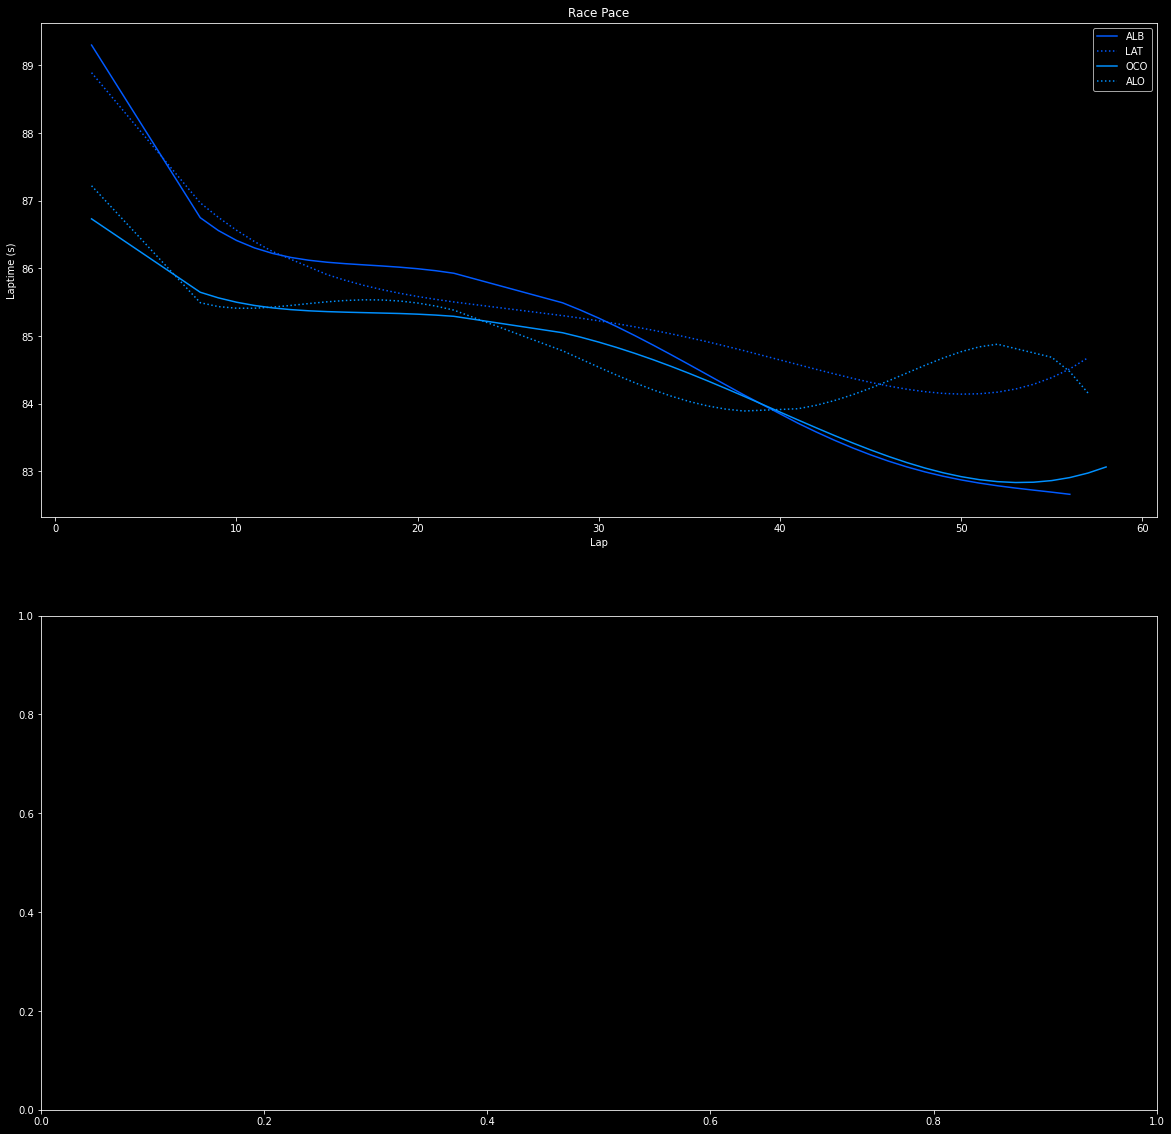

In [13]:
teams = []
plt.rcParams['figure.figsize'] = [20, 20]
fig, ax = plt.subplots(2)
laptimes = [laps.pick_driver(x)['LapTimeSeconds'].dropna() for x in drivers] 
# ax[0].boxplot(laptimes, labels=drivers)
# ax[0].set_title('Average racepace comparison')
# ax[0].set(ylabel = 'Laptime (s)')
for driver in drivers:
    driver_laps = laps.pick_driver(driver)[['LapNumber', 'LapTimeSeconds', 'Team']]
    driver_laps = driver_laps.dropna()
    team = pd.unique(driver_laps['Team'])[0]
    x = driver_laps['LapNumber']
    poly = np.polyfit(driver_laps['LapNumber'], driver_laps['LapTimeSeconds'], 5)
    y_poly = np.poly1d(poly)(driver_laps['LapNumber'])
    linestyle = '-' if team not in teams else ':'
    ax[0].plot(x, y_poly, label=driver, color=ff1.plotting.team_color(team), linestyle=linestyle)
    ax[0].set(ylabel = 'Laptime (s)')
    ax[0].set(xlabel = 'Lap')
    ax[0].set_title('Race Pace')
    ax[0].legend()
    teams.append(team)
    # plt.savefig('racepace_comparison.png', dpi=300)